In [1]:
import numpy as np
import pandas as pd

In [2]:
import pyaf.TS.Signal_Transformation as transf


In [3]:
%matplotlib inline

In [4]:
series = pd.Series(range(1, 12))

In [5]:
def tr1(x):
    if(x >= 0):
        return np.log(1 + x);
    return -np.log(1 - x);

In [6]:
df = pd.DataFrame()
N = 1000
df['t'] = range(N)
df['gauss'] = np.random.randn(N)
df['sig'] = np.exp(np.random.randn(N))
df['tr_sig'] = df['sig'].apply(tr1);

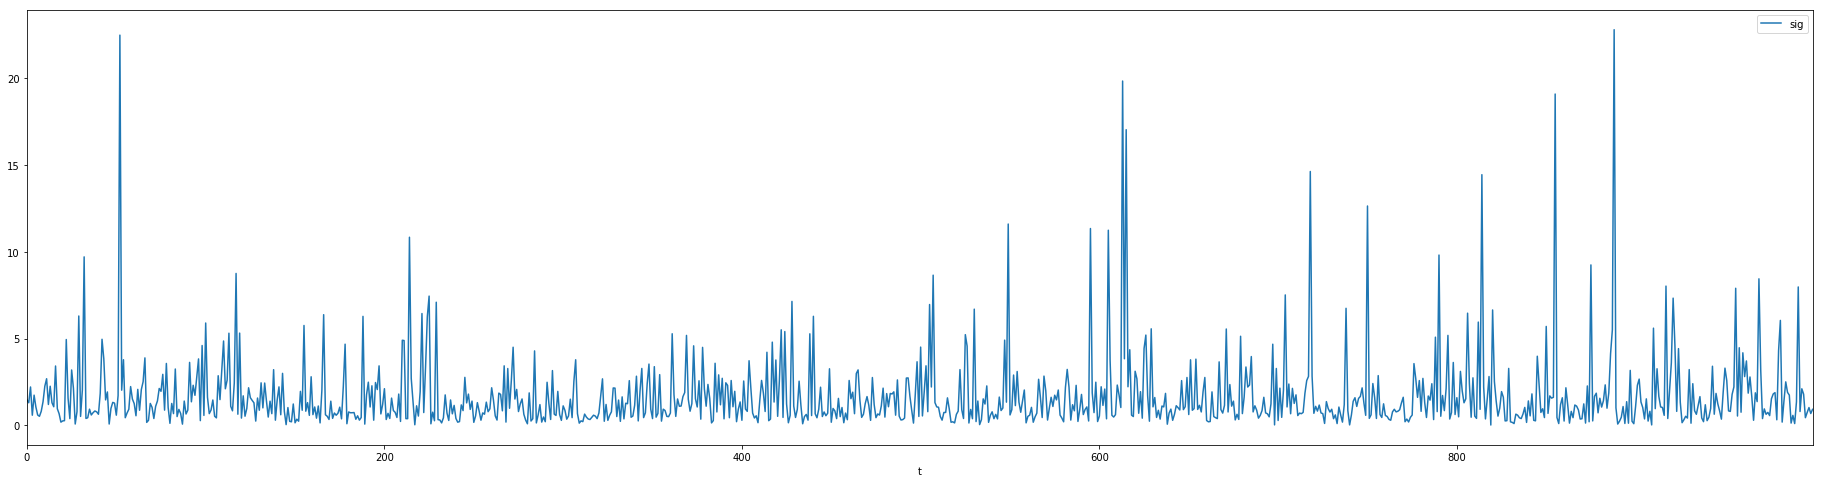

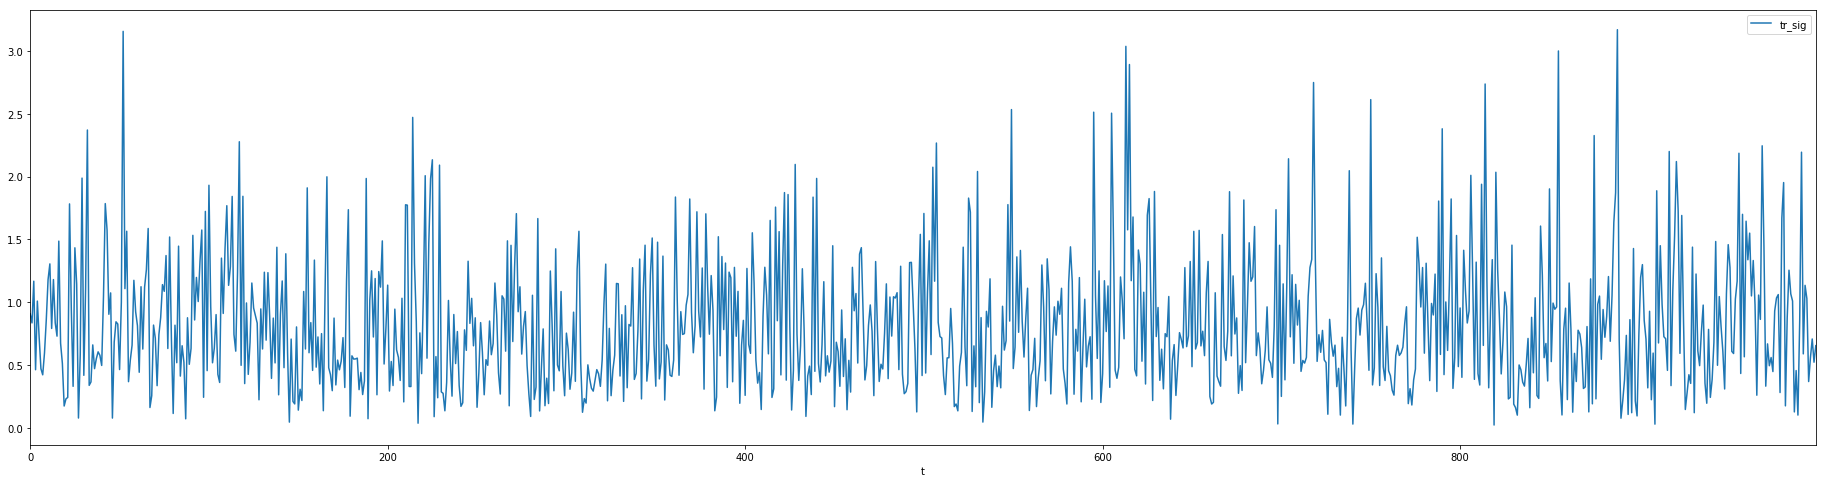

In [7]:
df.plot('t', ['sig'], figsize=(32,8))
df.plot('t', ['tr_sig'], figsize=(32,8))


In [8]:
df.describe()

,t,gauss,sig,tr_sig
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,0.016132,1.702997,0.820173
std,288.819436,0.982243,2.217595,0.530541
min,0.000000,-3.586764,0.023493,0.023222
25%,249.750000,-0.633596,0.528404,0.424224
50%,499.500000,0.043997,1.037966,0.711952
75%,749.250000,0.632666,2.066961,1.120687
max,999.000000,3.126885,22.786594,3.169122


In [9]:
transf.cSignalTransform_Differencing().apply(series)

0     NaN
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
dtype: float64

In [10]:
tr1 = transf.cSignalTransform_RelativeDifferencing();
tr1.fit(series)
s1 = tr1.apply(series)
s2 = tr1.invert(s1)
print(s1.head())
print(s2.head())


0    0.000000
1    0.100000
2    0.090909
3    0.083333
4    0.076923
dtype: float64
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64


In [11]:
s2 - series

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
dtype: float64

In [12]:
    def invert2(df):
        r = df;
        df_orig = 0.0 * df;
        df_orig.iloc[0] = (tr1.mFirstValue - tr1.mMinValue) / tr1.mDelta

        for i in range(1,df.shape[0]):
            previous_value = df_orig.iloc[i - 1] 
            df_orig.iloc[i] = previous_value + r.iloc[i]  * (previous_value + 1)

        df_orig = df_orig * tr1.mDelta + tr1.mMinValue;
        
        return df_orig;

In [13]:
s3 = invert2(s1)

In [14]:
s3

0     0.0
1     0.9
2     1.8
3     2.7
4     3.6
5     4.5
6     5.4
7     6.3
8     7.2
9     8.1
10    9.0
dtype: float64

In [15]:



def invert3(df):
    r = df;
    df_orig = 0.0 * df;
    df_orig.iloc[0] = (tr1.mFirstValue - tr1.mMinValue) / tr1.mDelta

    for i in range(1,df.shape[0]):
        previous_value = df_orig.iloc[i - 1] 
        df_orig.iloc[i] = previous_value + r.iloc[i]  * (previous_value + 1)

    df_orig = df_orig * tr1.mDelta + tr1.mMinValue;
        
    return df_orig;

In [16]:
invert3(s1)

0     0.0
1     0.9
2     1.8
3     2.7
4     3.6
5     4.5
6     5.4
7     6.3
8     7.2
9     8.1
10    9.0
dtype: float64